# EXPLORATORY DATA ANALYSIS BY USHNISH CHAKRAVARTY

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('Downloads/SampleSuperstore.csv')
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [3]:
df.shape

(9994, 13)

In [5]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [7]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [9]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [10]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [12]:
df['Sub-Category'].nunique()

17

In [13]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

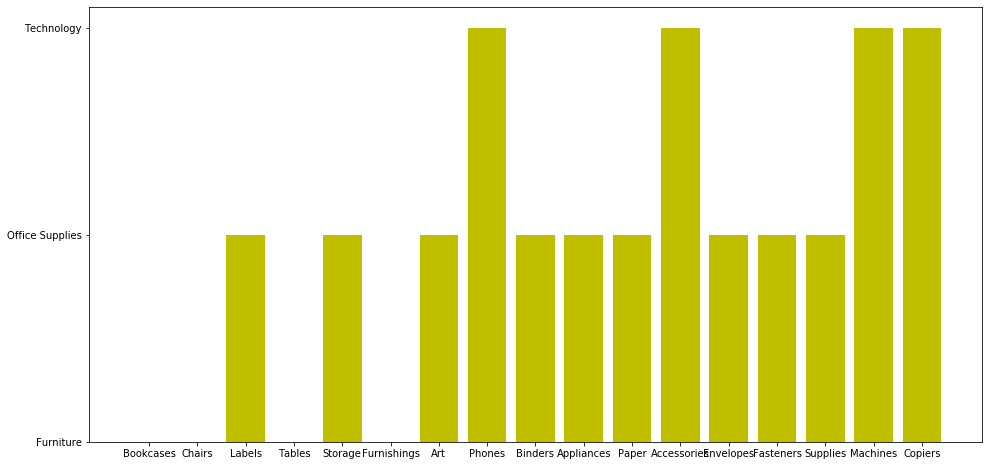

In [14]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=df,color='y')
plt.show()

From this graph, customers can decide which categories and sub categories to choose when buying a product.

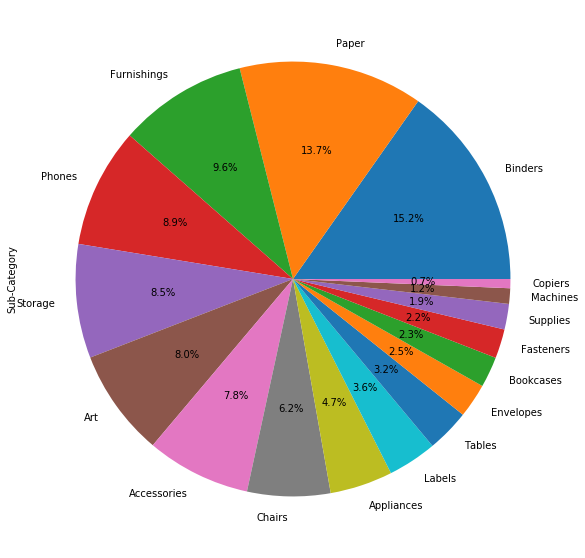

In [15]:
plt.figure(figsize=(12,10))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

This shows that the store has a lot of office supplies especially in Papers and Binders department

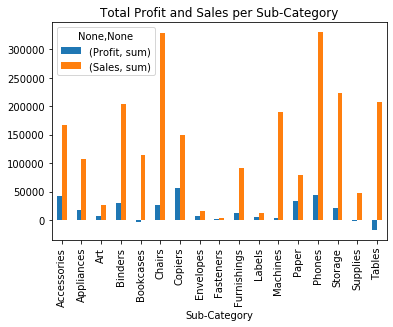

In [16]:
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
plt.show()

Highest profit is earned in Copiers while Selling price for Chairs and Phones is extremely high compared to other products.

Another interesting fact- people dont prefer to buy Tables and Bookcases from Superstore. Hence these departments are in loss.

In [19]:
df['Category'].nunique()

3

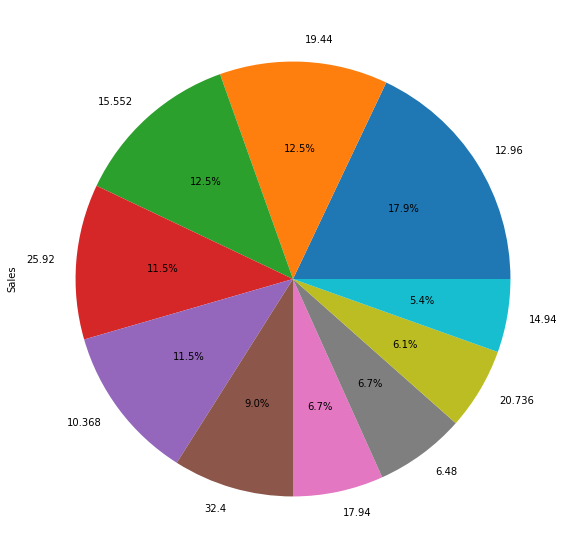

In [20]:
plt.figure(figsize=(12,10))
df['Sales'].value_counts().head(10).plot.pie(autopct="%1.1f%%")

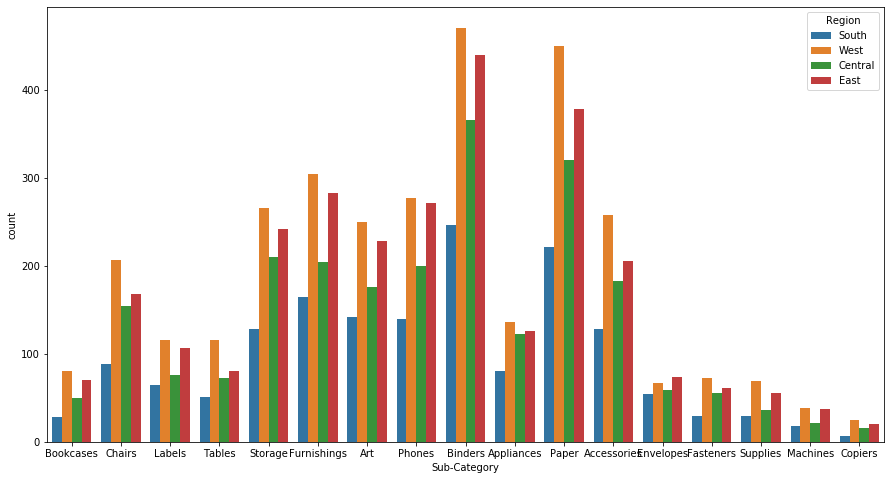

In [21]:
#Count of Sub-Category region wise
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=df)
plt.show()

People residing in Western part of US tend to order more from superstore.

In [22]:
df['Cost']=df['Sales']-df['Profit']
df['Cost'].head()

0     220.0464
1     512.3580
2       7.7486
3    1340.6085
4      19.8516
Name: Cost, dtype: float64

In [23]:
df['Profit %']=(df['Profit']/df['Cost'])*100

In [26]:
df.sort_values(['Profit %','Sales'],ascending=False).groupby('Profit %').head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
9039,Standard Class,Consumer,United States,Detroit,Michigan,48205,Central,Office Supplies,Binders,9892.740,13,0.0,4946.3700,4946.3700,100.000000
509,Standard Class,Consumer,United States,Atlanta,Georgia,30318,South,Office Supplies,Binders,6354.950,5,0.0,3177.4750,3177.4750,100.000000
318,Standard Class,Home Office,United States,New York City,New York,10024,East,Technology,Machines,3991.980,2,0.0,1995.9900,1995.9900,100.000000
7683,First Class,Home Office,United States,Midland,Michigan,48640,Central,Office Supplies,Binders,3812.970,3,0.0,1906.4850,1906.4850,100.000000
7280,Standard Class,Consumer,United States,Columbia,Maryland,21044,East,Office Supplies,Binders,2541.980,2,0.0,1270.9900,1270.9900,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6989,First Class,Consumer,United States,Abilene,Texas,79605,Central,Office Supplies,Appliances,1.392,2,0.8,-3.7584,5.1504,-72.972973
9164,Standard Class,Consumer,United States,Chicago,Illinois,60610,Central,Office Supplies,Appliances,143.128,2,0.8,-393.6020,536.7300,-73.333333
8766,Standard Class,Corporate,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,24.588,3,0.8,-67.6170,92.2050,-73.333333
676,Standard Class,Consumer,United States,Tyler,Texas,75701,Central,Office Supplies,Appliances,2.688,3,0.8,-7.3920,10.0800,-73.333333


This shows that retailers selling Binders have 100% profit in their business